In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data details


1.   age
2.   sex
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)(ECG)
8.maximum heart rate achieved
9.exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
11.the slope of the peak exercise ST segment
12.number of major vessels (0-3) colored by flourosopy
13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values



In [ ]:
data=pd.read_csv('/content/Heart Disease data.csv')

## Modelling

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
y=data['target']
x=data.drop(['target'],axis=1)

In [ ]:
x_t,x_test,y_t,y_test=train_test_split(x,y,test_size=0.2,random_state=352)

In [ ]:
reg=LogisticRegression()
reg.fit(x_t,y_t)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
acc=accuracy_score(y_test,y_pred)*100

In [ ]:
acc

80.97560975609757

In [ ]:
confusion_matrix(y_test, y_pred)

array([[67, 20],
       [19, 99]])

In [ ]:
result=pd.DataFrame(y_test)
result['y_pred']=y_pred

In [ ]:
result

,target,y_pred
32,0,0
1003,1,0
500,1,1
587,0,0
24,1,1
...,...,...
763,1,1
621,0,0
166,0,0
264,0,0


## data visualization

<Axes: >

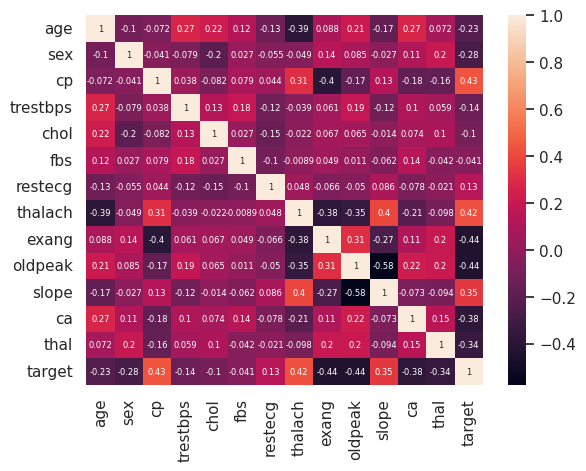

In [ ]:
sns.heatmap(data.corr(),annot=True,annot_kws={'size': 6})

In [ ]:
categorical_values = []
numerical_values = []

for column in data.columns:
    if data[column].nunique() <10:
        categorical_values.append(column)
    else:
        numerical_values.append(column)

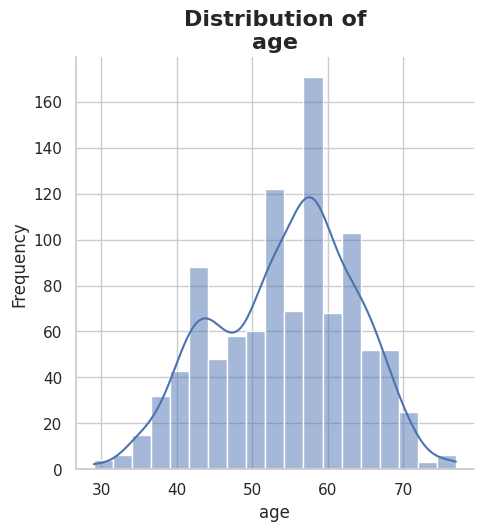

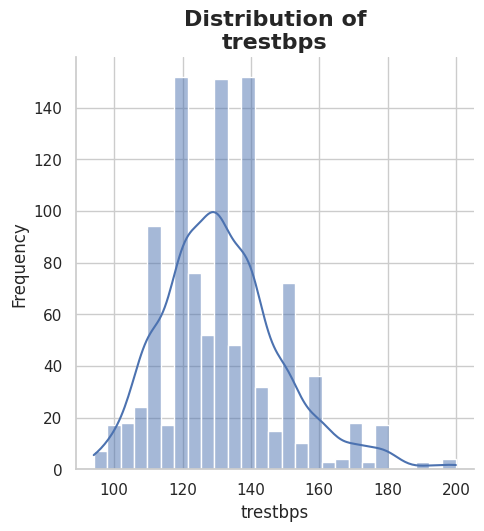

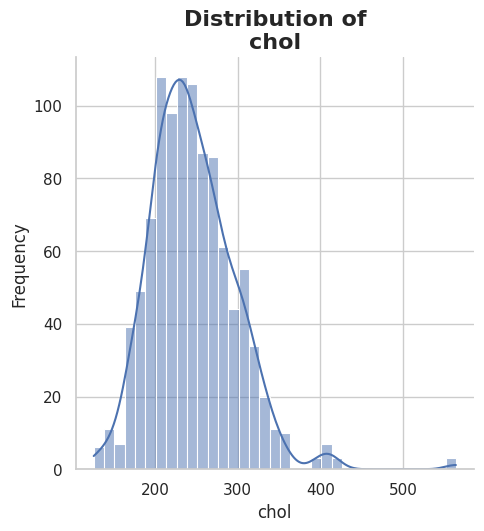

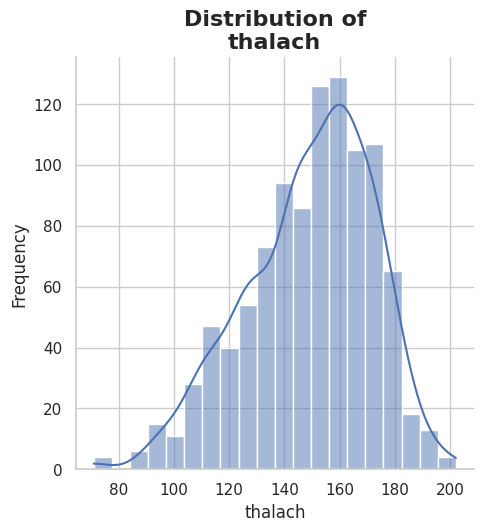

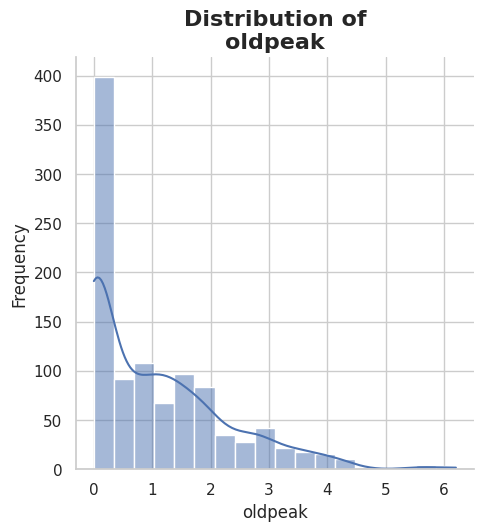

In [ ]:
for i in numerical_values:
  sns.set(style="whitegrid")
  sns.displot(data[i], kde=True, rug=False)
  plt.title('Distribution of\n'+ i, fontsize=16, fontweight='bold')
  plt.xlabel(i, fontsize=12)
  plt.ylabel('Frequency', fontsize=12)
  plt.show()

In [ ]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

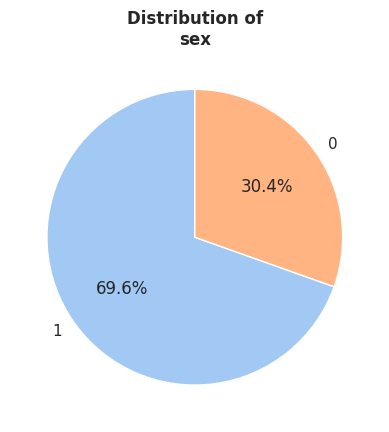

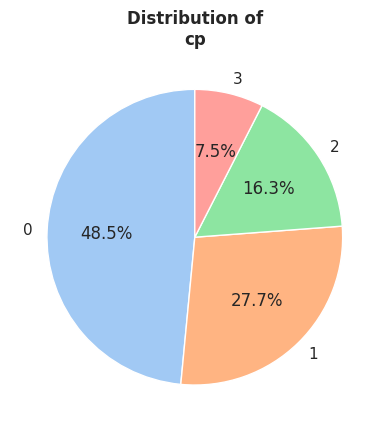

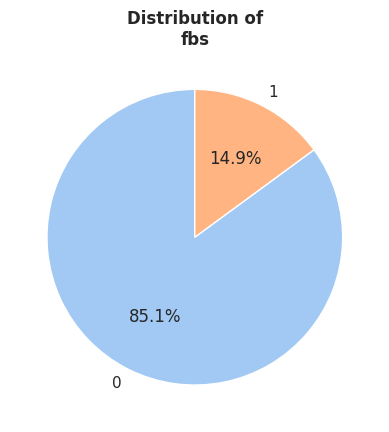

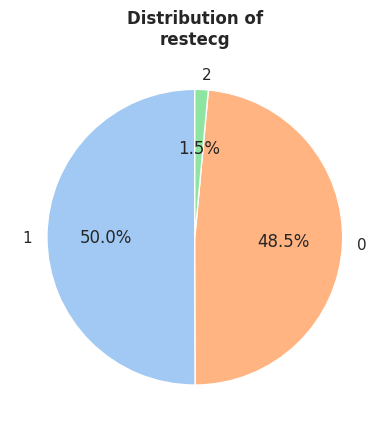

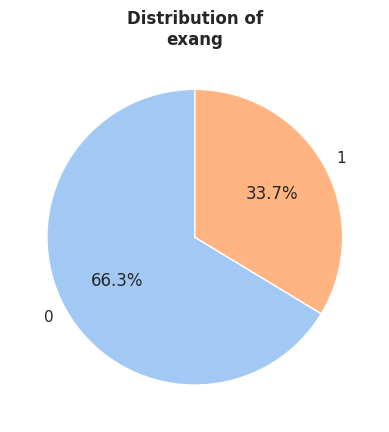

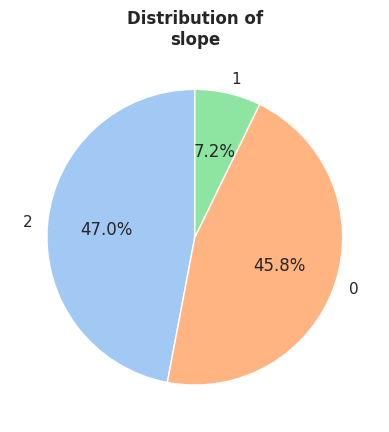

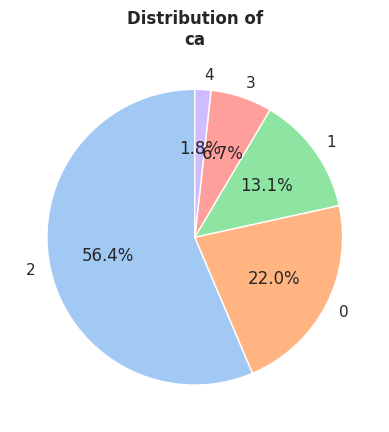

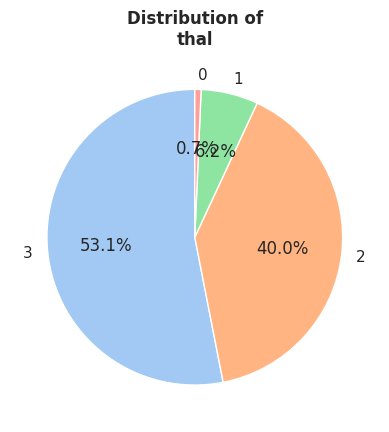

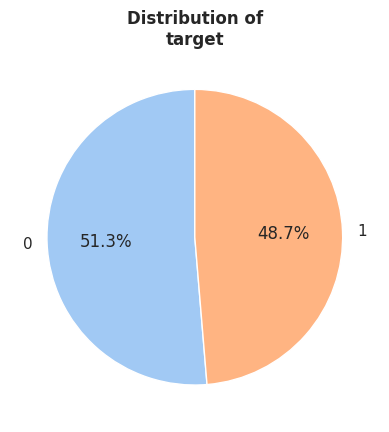

In [ ]:
for i in categorical_values:
  colors = sns.color_palette("pastel")
  plt.pie(data[i].value_counts(), labels=data[i].unique(), autopct='%1.1f%%', startangle=90, colors=colors)
  plt.title('Distribution of\n'+i, fontweight='bold')
  plt.show()

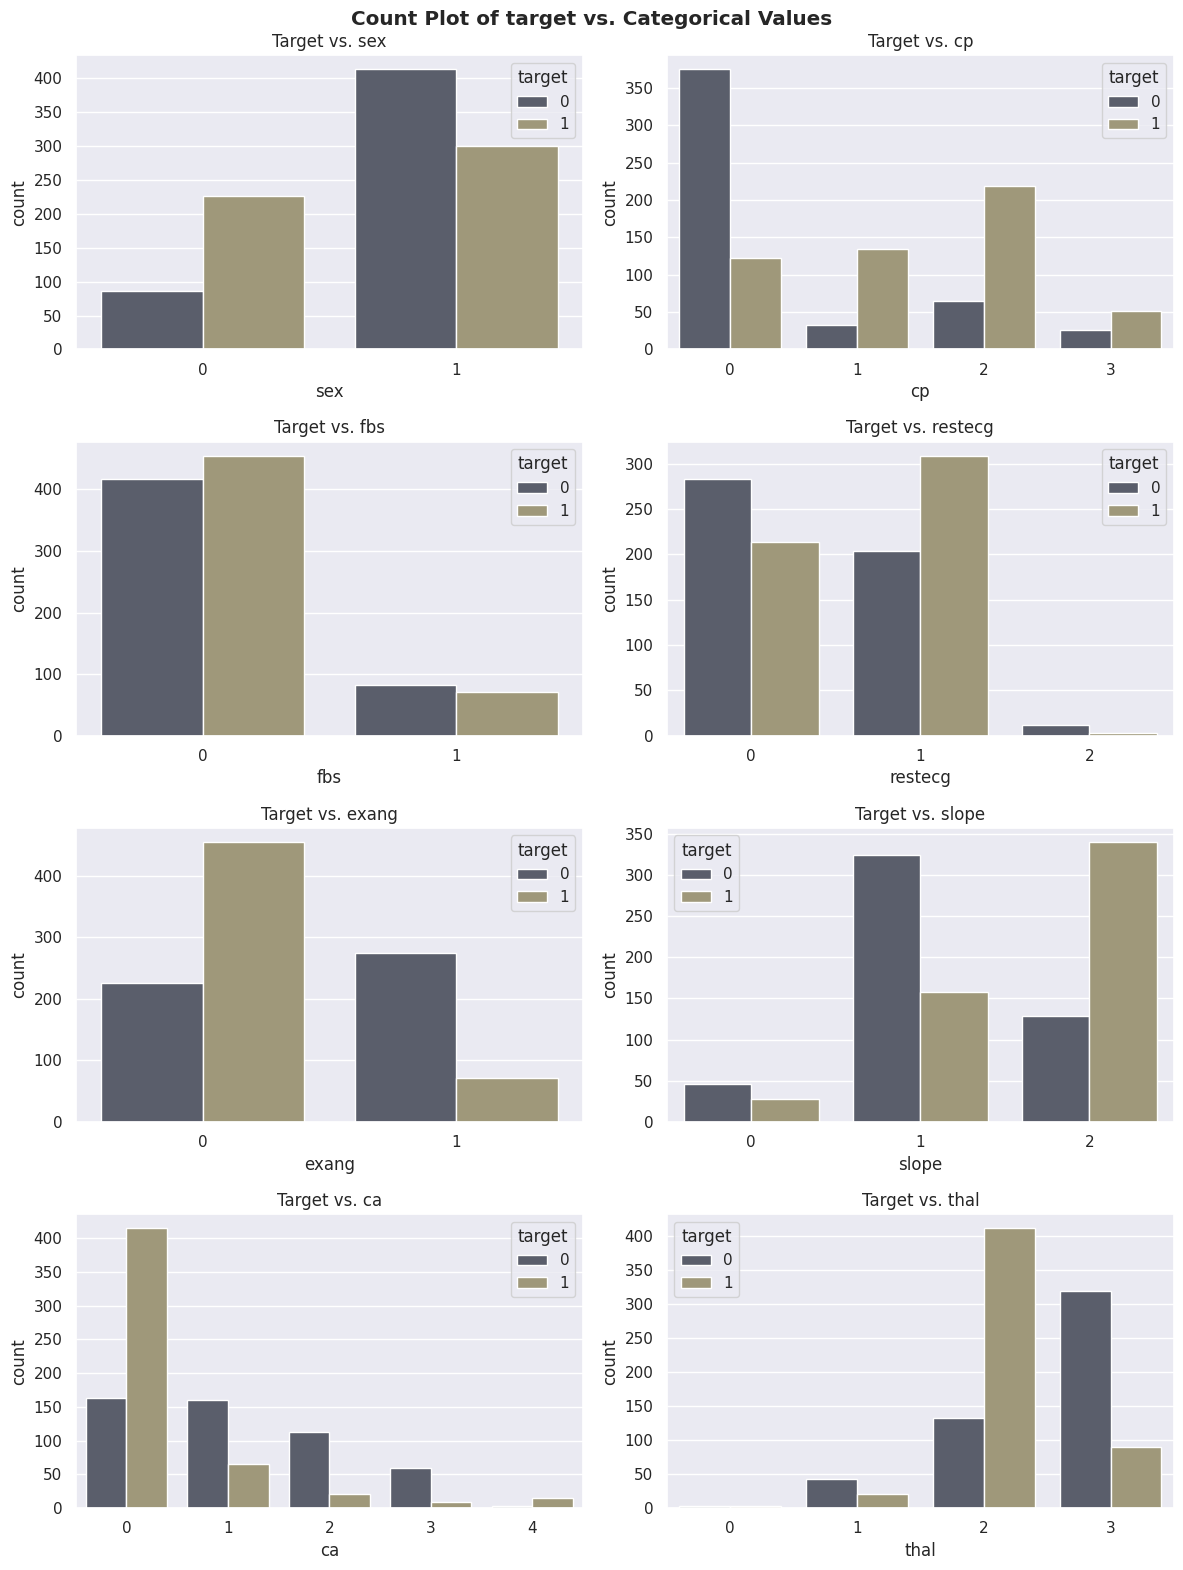

In [ ]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16))
axes = axes.flatten()

for i, cat in enumerate(categorical_values[:-1]):
    sns.countplot(x=cat, hue='target', data=data, ax=axes[i], palette='cividis')
    axes[i].set_title(f"Target vs. {cat}")

plt.suptitle("Count Plot of target vs. Categorical Values", fontweight='bold')
plt.tight_layout()
plt.show()

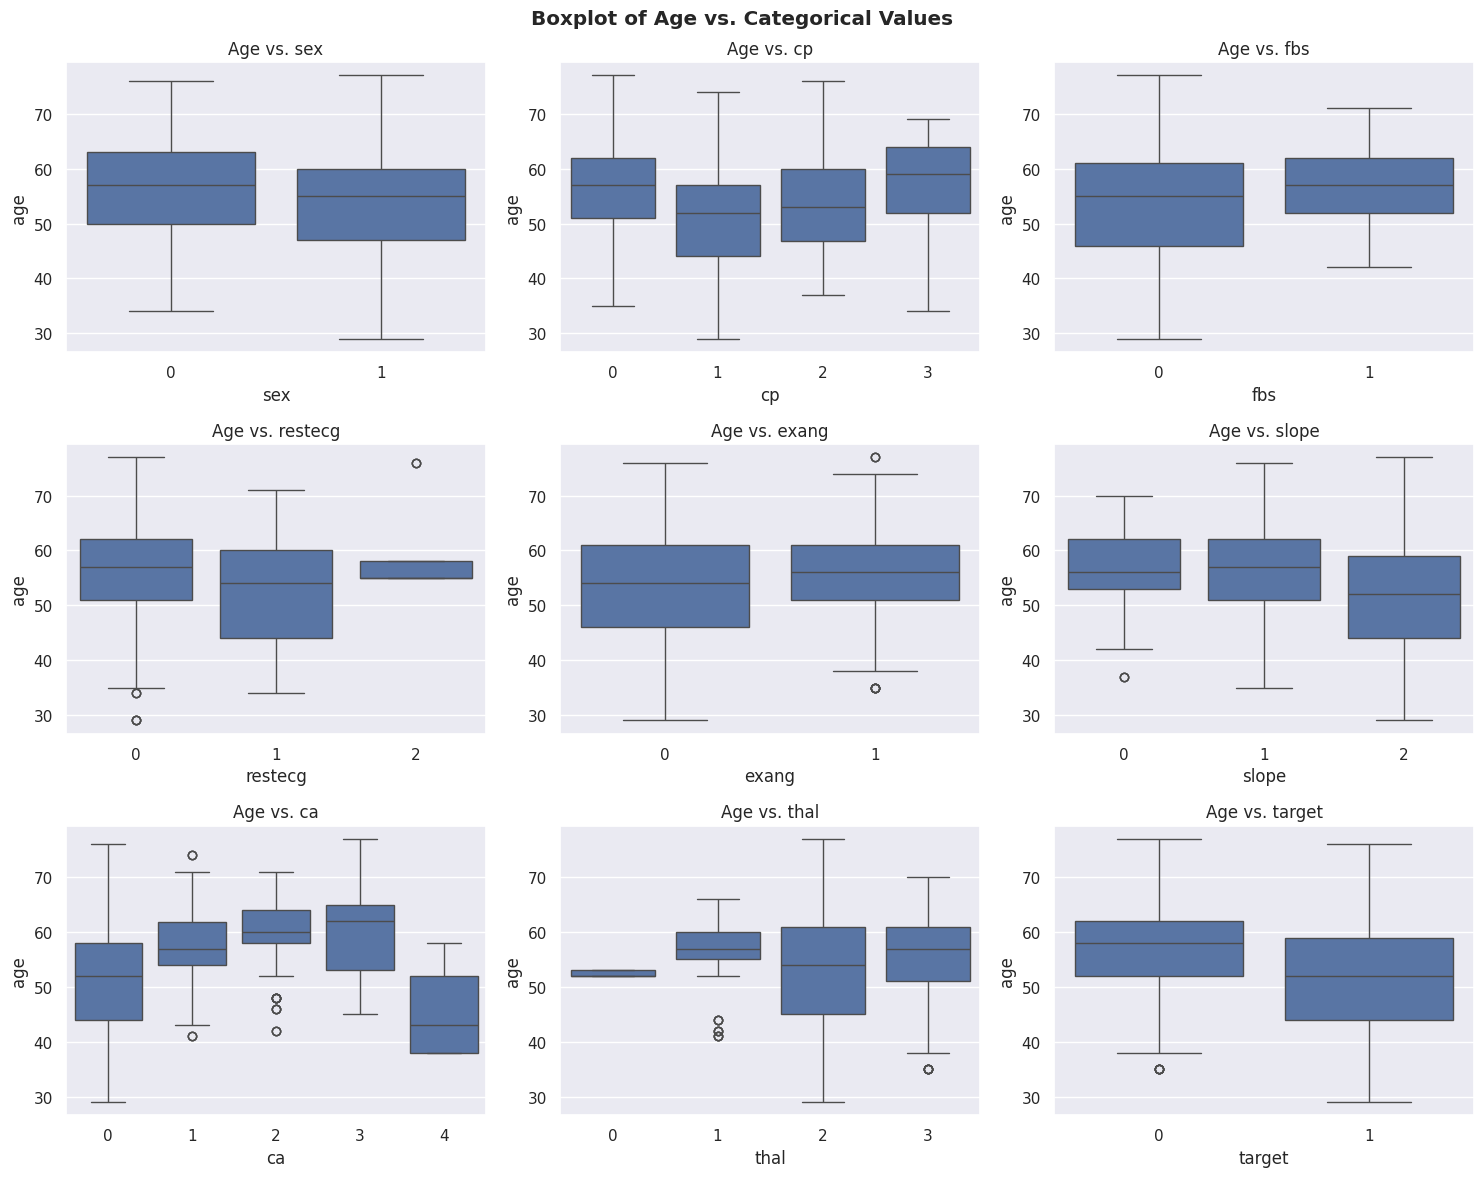

In [ ]:
# Age vs. Categorical Values

sns.set(style='darkgrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, cat_value in enumerate(categorical_values):
    sns.boxplot(x=cat_value, y='age', data=data, ax=axes[i])
    axes[i].set_title(f'Age vs. {cat_value}')

plt.suptitle("Boxplot of Age vs. Categorical Values", fontweight='bold')
plt.tight_layout()
plt.show()